# Milestone Project

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [3]:
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


### Day 4

#### 1. How many different companies are represented in the data set?

In [4]:
print("The number of different companies are %d" % len(df['Company Name'].unique()))

The number of different companies are 439


#### 2. What is the total number of jobs created for businesses in Queens?

In [3]:
x = df[df['City'] == 'Queens']['Job created'].isna()
queen_job = 0 
for jobs, x in zip(df[df['City'] == 'Queens']['Job created'],x):
    if x == False:
        queen_job += jobs
    else:
        pass

In [4]:
print("The number of jobs created in Queens is %d" % queen_job)

The number of jobs created in Queens is 90


#### 3. How many different unique email domains names are there in the data set?

In [8]:
print("The number of unique company email is %d" % len(df['company email'].unique()))

The number of unique company email is 421


#### 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [9]:
NTA_value_count_dict = dict(df['NTA'].value_counts())

In [10]:
nta_list = []
avg_saving = []
job_created = []

for name in NTA_value_count_dict.keys():
    if NTA_value_count_dict.get(name) >= 5:
        nta_list.append(name)
        x = df[df['NTA'] == name]['Savings from beginning receiving benefits'].mean()
        y = df[df['NTA'] == name]['Job created'].sum()
        #print(y)
        avg_saving.append(float(round(x,2)))
        job_created.append(int(y))

In [11]:
for key, value, count in zip(nta_list, avg_saving, job_created):
    #print(count)
    print("For %s, %d jobs created and total avg saving is $%6.2f" % (key, count, value))

For Hunters Point-Sunnyside-West Maspeth, 0 jobs created and total avg saving is $160609.32
For Sunset Park West, 0 jobs created and total avg saving is $139256.48
For Queensbridge-Ravenswood-Long Island City, 0 jobs created and total avg saving is $447198.66
For park-cemetery-etc-Brooklyn, 0 jobs created and total avg saving is $36740.33
For Mott Haven-Port Morris, 10 jobs created and total avg saving is $159905.58
For Greenpoint, 0 jobs created and total avg saving is $177222.06
For Hunts Point, 12 jobs created and total avg saving is $397635.45
For Carroll Gardens-Columbia Street-Red Hook, 0 jobs created and total avg saving is $184683.95
For East Williamsburg, 0 jobs created and total avg saving is $143369.48
For Bushwick South, 10 jobs created and total avg saving is $307800.03
For DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill, 0 jobs created and total avg saving is $437390.50
For Maspeth, 10 jobs created and total avg saving is $20783.18
For Crown Heights North, 0 jobs created

#### 5. Save your result for the previous question as a CSV file.

In [12]:
df_result = pd.DataFrame()

In [13]:
df_result['NTA'] = nta_list
df_result['Average savings'] = avg_saving
df_result['Jobs Created'] = job_created

In [14]:
df_result.to_csv('day4_result.csv')

### Day 5

#### Scatter plot of jobs created versus average savings. 

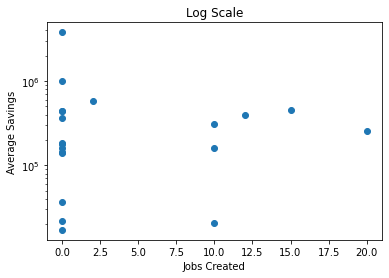

In [15]:
plt.scatter(job_created, avg_saving)
plt.xlabel('Jobs Created')
plt.ylabel('Average Savings')
plt.title('Log Scale')
plt.yscale('log')
plt.show()

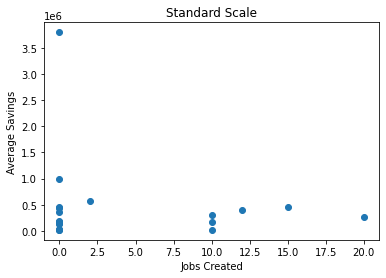

In [16]:
plt.scatter(job_created, avg_saving)
plt.xlabel('Jobs Created')
plt.ylabel('Average Savings')
plt.title('Standard Scale')
plt.show()

#### Histogram of the log of the average total savings.

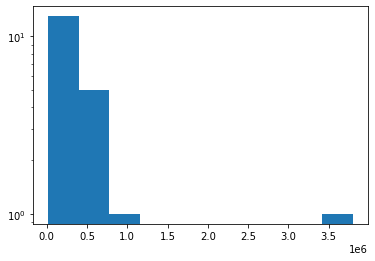

In [17]:
plt.hist(avg_saving)

plt.yscale('log')
plt.show()

#### Line plot of the total jobs created for each month.

In [18]:
x = list(df['Effective Date'])
x = pd.to_datetime(x)
y = list(df['Job created'])

In [19]:
df_5 = pd.DataFrame(data={'jobs created': y}, index=x)

In [21]:
df_5_m = df_5.resample('M').sum()

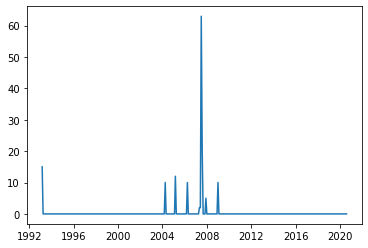

In [22]:
plt.plot(df_5_m.index, df_5_m['jobs created'])
plt.show()